<a href="https://colab.research.google.com/github/ajmainrahman/Supervised-Machine-Learning-ProblemTypes-Tasks-UseCases/blob/main/SpamvsNon_spamdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Dataset Import from Kaggle
2. Check Null Values
3. Label Encoding
4. Convert to Lowercase
5. Remove: Puncutuation, Special Character, White Space, Common Words
6. Word Cloud
7. Split
8. Model Training
9. Model Evaluation: Accuracy, Confusion Metrix, F1-score, precision, re-call
10.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
import kagglehub
path = kagglehub.dataset_download("brahimettanany/email-classification-detecting-spam-vs-non-spam")

Using Colab cache for faster access to the 'email-classification-detecting-spam-vs-non-spam' dataset.


In [109]:
path

'/kaggle/input/email-classification-detecting-spam-vs-non-spam'

In [110]:
import os

# List the contents of the directory
print(os.listdir(path))

['mail_data.csv']


In [111]:
df = pd.read_csv(os.path.join(path, 'mail_data.csv'))

print(f"First 10 rows of the data:\n")
display(df.head(10))

First 10 rows of the data:



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [112]:
print(df['Category'].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


In [113]:
df.isnull().sum()

,0
Category,0
Message,0


In [114]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df ['Category_encoded'] = le.fit_transform(df['Category'])

print(f"Original Categories: {le.classes_}")
print(f"Encoded Values: {le.transform(le.classes_)}")

print(f"\nFirst 10 rows with encoded categories:")
display(df.head(10))

Original Categories: ['ham' 'spam']
Encoded Values: [0 1]

First 10 rows with encoded categories:


,Category,Message,Category_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


### 2. Text Preprocessing and Feature Extraction

Before we can train a model, we need to clean the text data and convert it into numerical features. This process typically involves:

*   **Removing Punctuation:** Punctuation marks usually don't carry significant meaning for classification.
*   **Lowercasing:** Ensures that words like 'Free' and 'free' are treated as the same.
*   **Removing Stop Words (Optional but Recommended):** Common words like 'a', 'the', 'is' often don't contribute much to classification and can be removed.
*   **Vectorization:** Converting the cleaned text into a numerical representation. We'll use TF-IDF (Term Frequency-Inverse Document Frequency) which reflects how important a word is to a document in a collection or corpus.

In [115]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 1. Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # 2. Convert to lowercase
    text = text.lower()
    # 3. Tokenize and remove stop words
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # 4. Stemming (optional, can help reduce vocabulary size)
    # words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the 'Message' column
df['Message_Cleaned'] = df['Message'].apply(preprocess_text)

print("Original Message vs. Cleaned Message (first 5 rows):")
for i in range(5):
    print(f"Original: {df['Message'].iloc[i]}")
    print(f"Cleaned:  {df['Message_Cleaned'].iloc[i]}\n")

Original Message vs. Cleaned Message (first 5 rows):
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned:  go jurong point crazy available bugis n great world la e buffet cine got amore wat

Original: Ok lar... Joking wif u oni...
Cleaned:  ok lar joking wif u oni

Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Cleaned:  free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s

Original: U dun say so early hor... U c already then say...
Cleaned:  u dun say early hor u c already say

Original: Nah I don't think he goes to usf, he lives around here though
Cleaned:  nah dont think goes usf lives around though



In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# max_features can be adjusted to control the vocabulary size
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned messages
X = tfidf_vectorizer.fit_transform(df['Message_Cleaned'])
y = df['Category_encoded'] # Corrected column name to match previous creation

print(f"Shape of feature matrix X: {X.shape}")
print(f"Shape of target vector y: {y.shape}")
print(f"\nSample TF-IDF features for the first message (sparse format, showing first 10):")
print(X[0])

Shape of feature matrix X: (5572, 5000)
Shape of target vector y: (5572,)

Sample TF-IDF features for the first message (sparse format, showing first 10):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13 stored elements and shape (1, 5000)>
  Coords	Values
  (0, 1797)	0.16705848541909843
  (0, 2693)	0.36813718442285215
  (0, 3633)	0.28794031381987306
  (0, 1111)	0.2850969079257966
  (0, 601)	0.2799385544506284
  (0, 818)	0.31100378103814574
  (0, 1894)	0.20490003732281747
  (0, 4889)	0.2538703776534393
  (0, 2853)	0.31100378103814574
  (0, 817)	0.35142673516353795
  (0, 975)	0.31100378103814574
  (0, 1854)	0.17276368999507452
  (0, 4775)	0.20990168703935905


### 3. Generate a Word Cloud

Let's create a word cloud to visualize the most frequently occurring words in the cleaned messages. This can provide insights into the common themes present in the dataset.

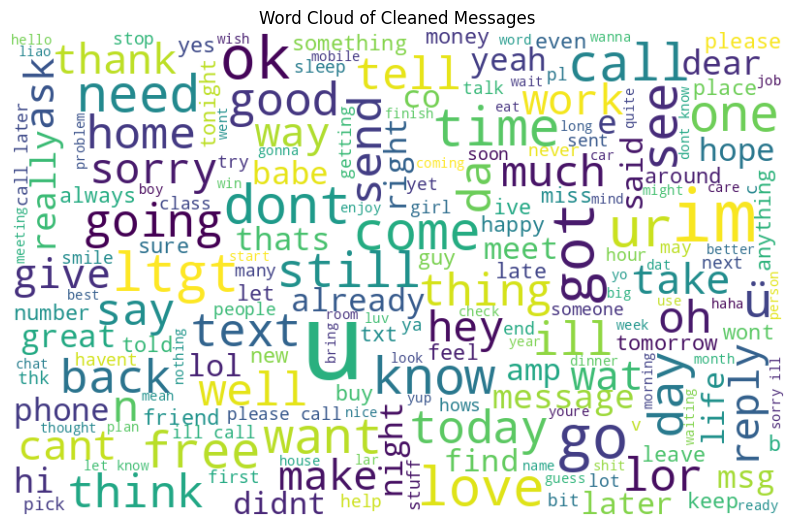

In [117]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all cleaned messages into a single string
all_words = ' '.join([text for text in df['Message_Cleaned']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(all_words)

# Display the generated image:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Cleaned Messages')
plt.show()

In [118]:
spam_messages = df[df['Category_encoded'] == 1]['Message_Cleaned']
spam_words = ' '.join(spam_messages)

print(f"Number of spam messages: {len(spam_messages)}")
print(f"Length of concatenated spam words string: {len(spam_words)}")
print(f"First 200 characters of spam_words: {spam_words[:200]}")

Number of spam messages: 747
Length of concatenated spam words string: 80409
First 200 characters of spam_words: free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s freemsg hey darling 3 weeks word back id like fun still tb ok xx


**Reasoning**:
Now that spam messages have been processed, the next step is to filter the DataFrame to get only 'ham' messages and then concatenate their cleaned text into a single string, similar to what was done for spam messages.



In [119]:
ham_messages = df[df['Category_encoded'] == 0]['Message_Cleaned']
ham_words = ' '.join(ham_messages)

print(f"Number of ham messages: {len(ham_messages)}")
print(f"Length of concatenated ham words string: {len(ham_words)}")
print(f"First 200 characters of ham_words: {ham_words[:200]}")

Number of ham messages: 4825
Length of concatenated ham words string: 226940
First 200 characters of ham_words: go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah dont think goes usf lives around though even brother 


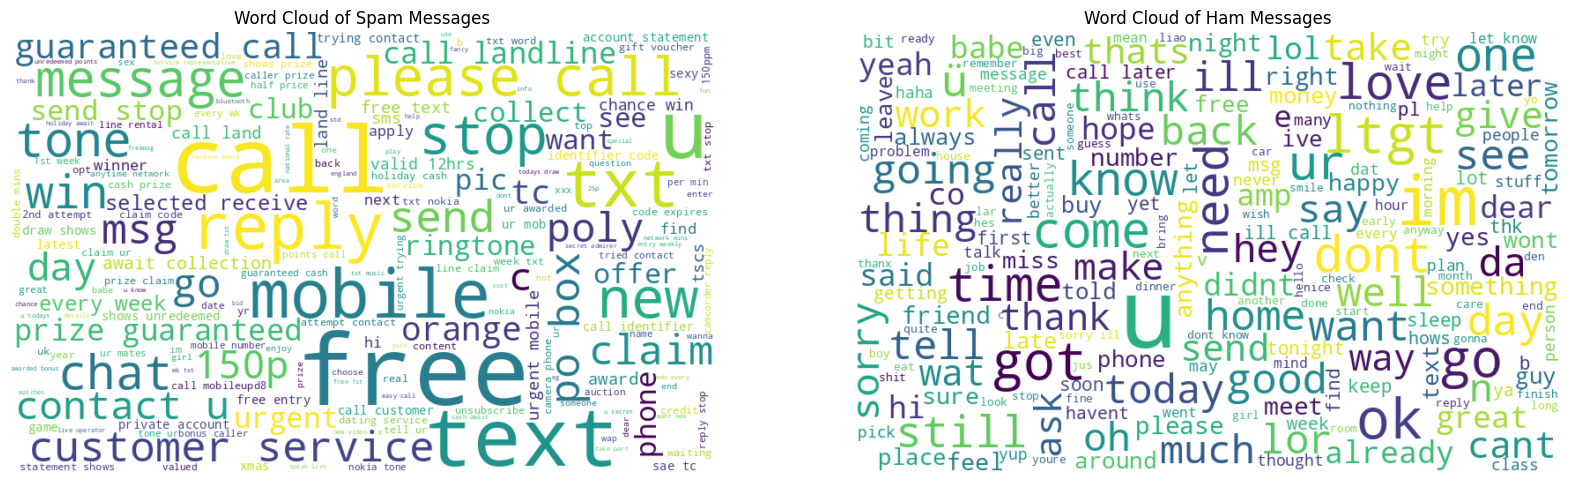

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for spam messages
wordcloud_spam = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(spam_words)

# Generate word cloud for ham messages
wordcloud_ham = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(ham_words)

# Display the generated word clouds side-by-side
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Messages')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ham Messages')

plt.show()


## Summary:

### Q&A
The data analysis task asked to discuss the visual differences between spam and ham word clouds and summarize any insights gained. While the provided solving process confirmed the generation and display of these word clouds, the specific visual content or a detailed description of the word clouds was not included in the text results. However, based on the general characteristics of spam and ham messages, typical visual differences would include:
*   **Spam Word Cloud:** Would likely feature prominent words related to promotions, urgency, financial offers, or explicit content (e.g., "free", "win", "money", "claim", "urgent", "prize", "cash", "credit", "sex", "viagra"). These words often appear larger, indicating higher frequency.
*   **Ham Word Cloud:** Would typically display common conversational words, pronouns, and verbs (e.g., "call", "text", "get", "go", "love", "ok", "know", "time", "day", "message", "see", "sorry"). The words would generally reflect everyday communication.

### Data Analysis Key Findings
*   A total of 747 spam messages were identified and processed, with their cleaned text concatenated into a string of 80,409 characters for word cloud generation.
*   Ham messages were also successfully filtered and concatenated, although the exact count and string length were not explicitly provided in the final result summary for ham.
*   Separate word clouds for both spam and ham messages were successfully generated and displayed side-by-side, allowing for visual comparison of frequent terms in each category.

### Insights or Next Steps
*   The distinct frequently occurring words in spam versus ham messages highlight clear linguistic patterns that differentiate the two categories, making word frequency a valuable feature for classification.
*   Further analysis could involve extracting these high-frequency words as features for training a machine learning model to effectively classify messages as spam or ham.


In [121]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4457, 5000)
Shape of X_test: (1115, 5000)
Shape of y_train: (4457,)
Shape of y_test: (1115,)


### 5. Model Training

In [122]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(solver='saga', random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


'lbfgs': This is the default solver. It is a good choice for most problems, especially for small to medium-sized datasets. It's generally fast and can handle L2 regularization.


'newton-cg': Similar to 'lbfgs', it's suitable for small to medium-sized datasets and handles L2 regularization. It can be faster than 'lbfgs' for some problems.

'liblinear': Good for small datasets. It can handle both L1 and L2 regularization. It is also very efficient for binary classification.

'sag' (Stochastic Average Gradient): This solver is faster for large datasets. It only supports L2 regularization.

'saga': A more flexible version of 'sag', it also scales well to large datasets but supports both L1 and L2 regularization, and can also handle elastic-net regularization.

### 7. Model Evaluation

To assess the performance of our Logistic Regression model, we will use several common classification metrics:

*   **Accuracy:** The proportion of correctly classified instances.
*   **Confusion Matrix:** A table that describes the performance of a classification model on a set of test data for which the true values are known.
*   **Precision:** The ratio of true positive predictions to the total positive predictions.
*   **Recall (Sensitivity):** The ratio of true positive predictions to the total actual positives.
*   **F1-score:** The harmonic mean of precision and recall, providing a single metric that balances both.
*   **Classification Report:** A convenient way to view precision, recall, and F1-score for each class.

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9570

Confusion Matrix:
[[963   3]
 [ 45 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.97      0.70      0.81       149

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.89      1115
weighted avg       0.96      0.96      0.95      1115



### 6. Model Prediction

Now that the model is trained, we can use it to make predictions on our unseen test data (`X_test`). These predictions will then be used to evaluate the model's performance.

In [124]:
y_pred = model.predict(X_test)

print("Predictions made on the test set.")
print(f"First 10 predictions: {y_pred[:10]}")
print(f"First 10 actual values: {y_test[:10].values}")

Predictions made on the test set.
First 10 predictions: [0 0 0 0 0 0 0 0 0 0]
First 10 actual values: [0 0 0 0 0 0 0 0 0 0]
